# StackOverflow data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Import 2017 data

In [3]:
Data2017 = pd.read_csv('Stackoverflow_Data/survey_results_public_2017.csv')
Data2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Import 2018 data

In [4]:
Data2018 = pd.read_csv('Stackoverflow_Data/survey_results_public_2018.csv')
Data2018.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


## Import 2019 data

In [5]:
Data2019 = pd.read_csv('Stackoverflow_Data/survey_results_public_2019.csv')
Data2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


## Import 2020 data

In [6]:
Data2020 = pd.read_csv('Stackoverflow_Data/survey_results_public_2020.csv')
Data2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


# Check the top languages used in the last 4 years

In [10]:
## Checking column names in different datasets
# Languages_with_years = pd.DataFrame(columns=['Year','CurrentWorkingLanguage','DesiredLanguage'])
print('2017 data')
print(Data2017.columns[Data2017.columns.str.contains('Language')])
print('2018 data')
print(Data2018.columns[Data2018.columns.str.contains('Language')])
print('2019 data')
print(Data2019.columns[Data2019.columns.str.contains('Language')])
print('2020 data')
print(Data2020.columns[Data2020.columns.str.contains('Language')])



2017 data
Index(['HaveWorkedLanguage', 'WantWorkLanguage'], dtype='object')
2018 data
Index(['LanguageWorkedWith', 'LanguageDesireNextYear'], dtype='object')
2019 data
Index(['LanguageWorkedWith', 'LanguageDesireNextYear'], dtype='object')
2020 data
Index(['LanguageDesireNextYear', 'LanguageWorkedWith'], dtype='object')


In [11]:
# Extracting Language columns from all datasets and add a Year column and create a new combined dataset to work with
Data2017['Year'] = '2017'
Data2018['Year'] = '2018'
Data2019['Year'] = '2019'
Data2020['Year'] = '2020'

Languages_with_years = pd.DataFrame()
Languages_with_years = Languages_with_years.append(Data2017[['Year','HaveWorkedLanguage','WantWorkLanguage']])
Languages_with_years = Languages_with_years.append(Data2018[['Year','LanguageWorkedWith', 'LanguageDesireNextYear']])
Languages_with_years = Languages_with_years.append(Data2019[['Year','LanguageWorkedWith', 'LanguageDesireNextYear']])
Languages_with_years = Languages_with_years.append(Data2020[['Year','LanguageWorkedWith', 'LanguageDesireNextYear']])

Languages_with_years.head()

,Year,HaveWorkedLanguage,WantWorkLanguage,LanguageWorkedWith,LanguageDesireNextYear
0,2017,Swift,Swift,NaN,NaN
1,2017,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,NaN,NaN
2,2017,Java; PHP; Python,C; Python; Rust,NaN,NaN
3,2017,Matlab; Python; R; SQL,Matlab; Python; R; SQL,NaN,NaN
4,2017,NaN,NaN,NaN,NaN


In [12]:
# Drop rows with all nulls
Languages_with_years = Languages_with_years.dropna(subset=['HaveWorkedLanguage','WantWorkLanguage','LanguageWorkedWith','LanguageDesireNextYear'], how='all', axis=0)

# Unifying column names
Languages_with_years['CurrentWorkingLanguage'] = Languages_with_years['HaveWorkedLanguage'].fillna('').astype(str) + Languages_with_years['LanguageWorkedWith'].fillna('').astype(str)
Languages_with_years['DesiredLanguage'] = Languages_with_years['WantWorkLanguage'].fillna('').astype(str) + Languages_with_years['LanguageDesireNextYear'].fillna('').astype(str)
Languages_with_years = Languages_with_years.drop(columns=['HaveWorkedLanguage','WantWorkLanguage','LanguageWorkedWith','LanguageDesireNextYear'])
# # Languages_with_years = pd.DataFrame(columns=['Year','CurrentWorkingLanguage','DesiredLanguage'])

Languages_with_years.head()

,Year,CurrentWorkingLanguage,DesiredLanguage
0,2017,Swift,Swift
1,2017,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL
2,2017,Java; PHP; Python,C; Python; Rust
3,2017,Matlab; Python; R; SQL,Matlab; Python; R; SQL
5,2017,JavaScript; PHP; Rust,Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...


In [13]:
List_of_Current_Languages_joined = ', '.join(Languages_with_years['CurrentWorkingLanguage'].str.replace(';',','))
List_of_Current_Languages = List_of_Current_Languages_joined.replace(r"/",',').replace(' ','').split(',')

# List_of_Current_Languages
List_of_Current_Languages_unique = set(List_of_Current_Languages)
print('The number of unique current working languages is: ' + str(len(List_of_Current_Languages_unique)))

List_of_Desired_Languages_joined = ', '.join(Languages_with_years['DesiredLanguage'].str.replace(';',','))
List_of_Desired_Languages = List_of_Desired_Languages_joined.replace(r"/",',').replace(' ','').split(',')

# List_of_Desired_Languages
List_of_Desired_Languages_unique = set(List_of_Desired_Languages)
print('The number of unique Desired working languages is: ' + str(len(List_of_Desired_Languages_unique)))

#Are the two list equal?
if List_of_Current_Languages_unique == List_of_Desired_Languages_unique: print("The two lists oflanguages are the same.")

List_of_Languages = List_of_Current_Languages_unique
List_of_Languages.remove('')
List_of_Languages

The number of unique current working languages is: 48
The number of unique Desired working languages is: 48
The two lists oflanguages are the same.


{'Assembly',
 'Bash',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'CommonLisp',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'ObjectPascal',
 'Objective-C',
 'Ocaml',
 'Other(s):',
 'PHP',
 'Perl',
 'PowerShell',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Shell',
 'Smalltalk',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'VisualBasic6',
 'WebAssembly'}

The top 5 working languages in year 2017: 

[' SQL', ' JavaScript', ' Python', ' PHP', ' Java']




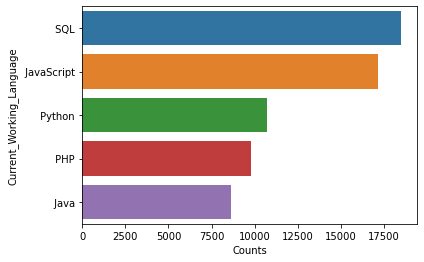

The top 5 working languages in year 2018: 

['JavaScript', 'HTML', 'CSS', 'SQL', 'Java']




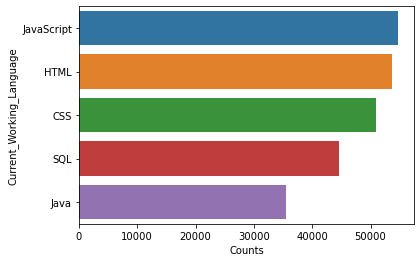

The top 5 working languages in year 2019: 

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']




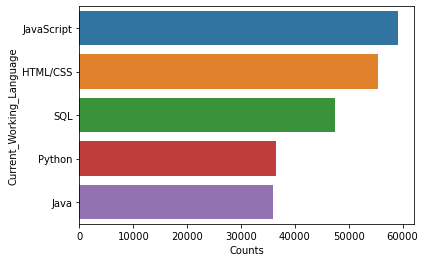

The top 5 working languages in year 2020: 

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']




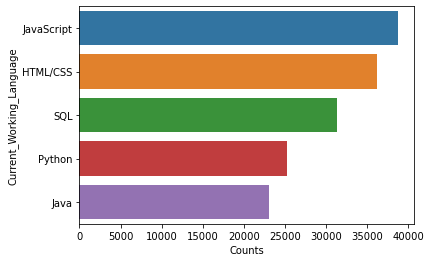

-------------------------------------------
The top 5 desired languages in year 2017: 

[' JavaScript', ' Python', ' SQL', 'C#', ' Java']




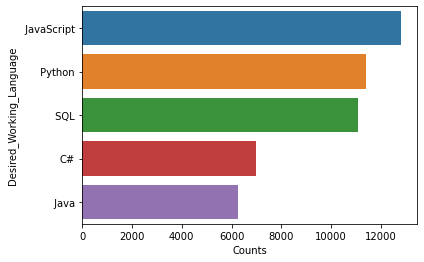

The top 5 desired languages in year 2018: 

['JavaScript', 'Python', 'HTML', 'CSS', 'SQL']




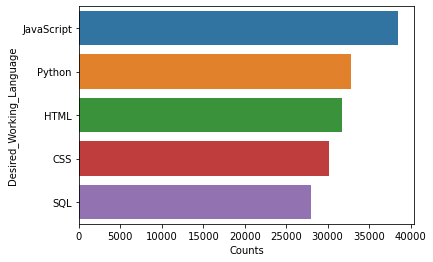

The top 5 desired languages in year 2019: 

['JavaScript', 'Python', 'HTML/CSS', 'SQL', 'TypeScript']




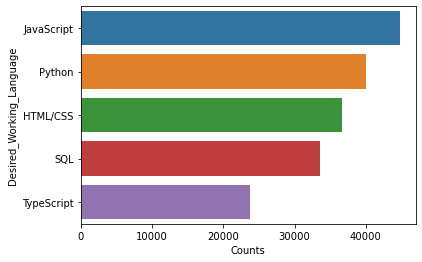

The top 5 desired languages in year 2020: 

['Python', 'JavaScript', 'HTML/CSS', 'SQL', 'TypeScript']




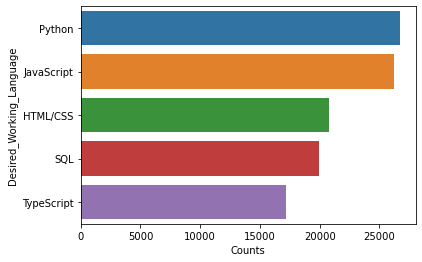

In [14]:
## Count Occurences of each Language in Current per Year
Count_Current_df = Languages_with_years.assign(var1=Languages_with_years['CurrentWorkingLanguage'].str.split(';')).explode('var1')

Count_Current_df.rename(columns={'var1':'Current_Working_Language'}, inplace=True)
Count_Current_df.drop(columns=['CurrentWorkingLanguage','DesiredLanguage'], inplace=True)
Final_Count_df = Count_Current_df.value_counts()
Final_Count_df.to_csv('Counts_current_languages.csv')
type(Final_Count_df.to_frame())
Final_Count_df = Final_Count_df.to_frame()
Final_Count_df.reset_index(inplace=True)
Final_Count_df.columns = ['Year','Current_Working_Language','Counts']
Final_Count_df
Final_Count_df.sort_values(by=['Year','Counts'], ascending=False)

for year in ['2017','2018','2019','2020']:
    print('The top 5 working languages in year '+year+ ': \n')
    print(Final_Count_df[Final_Count_df['Year'] == year]['Current_Working_Language'].head(5).to_list())
    print('\n')
    plt.figure(year.index(year))
    sns.barplot(x = 'Counts', 
            y = 'Current_Working_Language',
#             hue = 'Year',
            data = Final_Count_df[Final_Count_df['Year'] == year].head(5))
    plt.show()

print('-------------------------------------------')    

## Count Occurences of each Language in Desired per Year
Count_Desired_df = Languages_with_years.assign(var1=Languages_with_years['DesiredLanguage'].str.split(';')).explode('var1')

Count_Desired_df.rename(columns={'var1':'Desired_Working_Language'}, inplace=True)
Count_Desired_df.drop(columns=['CurrentWorkingLanguage','DesiredLanguage'], inplace=True)
Final_Count_Desired_df = Count_Desired_df.value_counts()
Final_Count_Desired_df.to_csv('Counts_Desired_languages.csv')
Final_Count_Desired_df = Final_Count_Desired_df.to_frame()
Final_Count_Desired_df.reset_index(inplace=True)
Final_Count_Desired_df.columns = ['Year','Desired_Working_Language','Counts']
Final_Count_Desired_df
Final_Count_Desired_df.sort_values(by=['Year','Counts'], ascending=False)

for year in ['2017','2018','2019','2020']:
    print('The top 5 desired languages in year '+year+ ': \n')
    print(Final_Count_Desired_df[Final_Count_Desired_df['Year'] == year]['Desired_Working_Language'].head(5).to_list())
    print('\n')
    plt.figure(year.index(year))
    sns.barplot(x = 'Counts', 
            y = 'Desired_Working_Language',
            data = Final_Count_Desired_df[Final_Count_Desired_df['Year'] == year].head(5))
    plt.show()



<AxesSubplot:xlabel='Counts', ylabel='Current_Working_Language'>

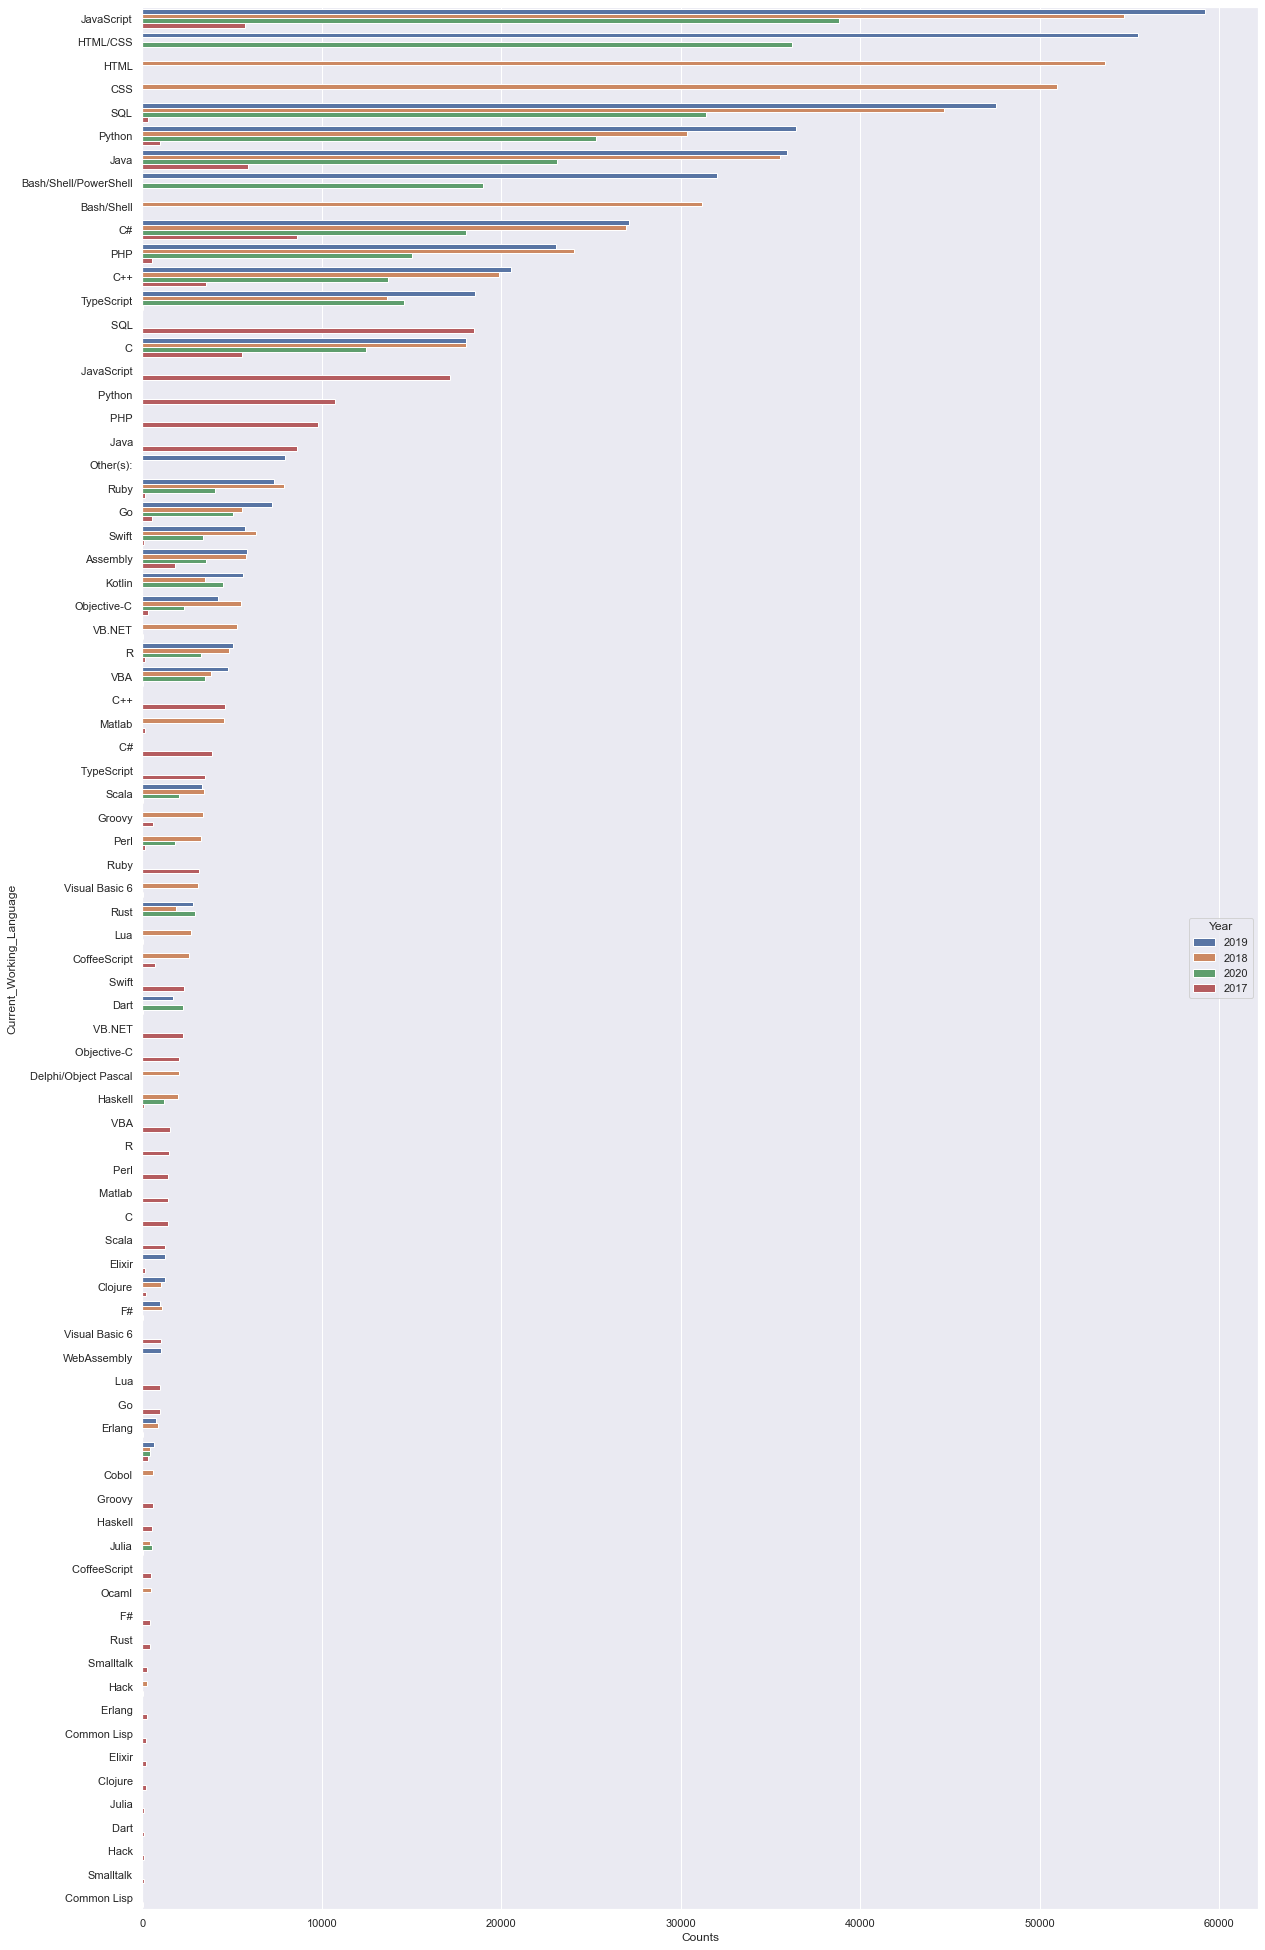

In [15]:
sns.set(rc={'figure.figsize':(20,35)})
sns.barplot(x = 'Counts', 
            y = 'Current_Working_Language',
            hue = 'Year',
            data = Final_Count_df.sort_values(by='Counts', ascending=False))

<AxesSubplot:xlabel='Counts', ylabel='Desired_Working_Language'>

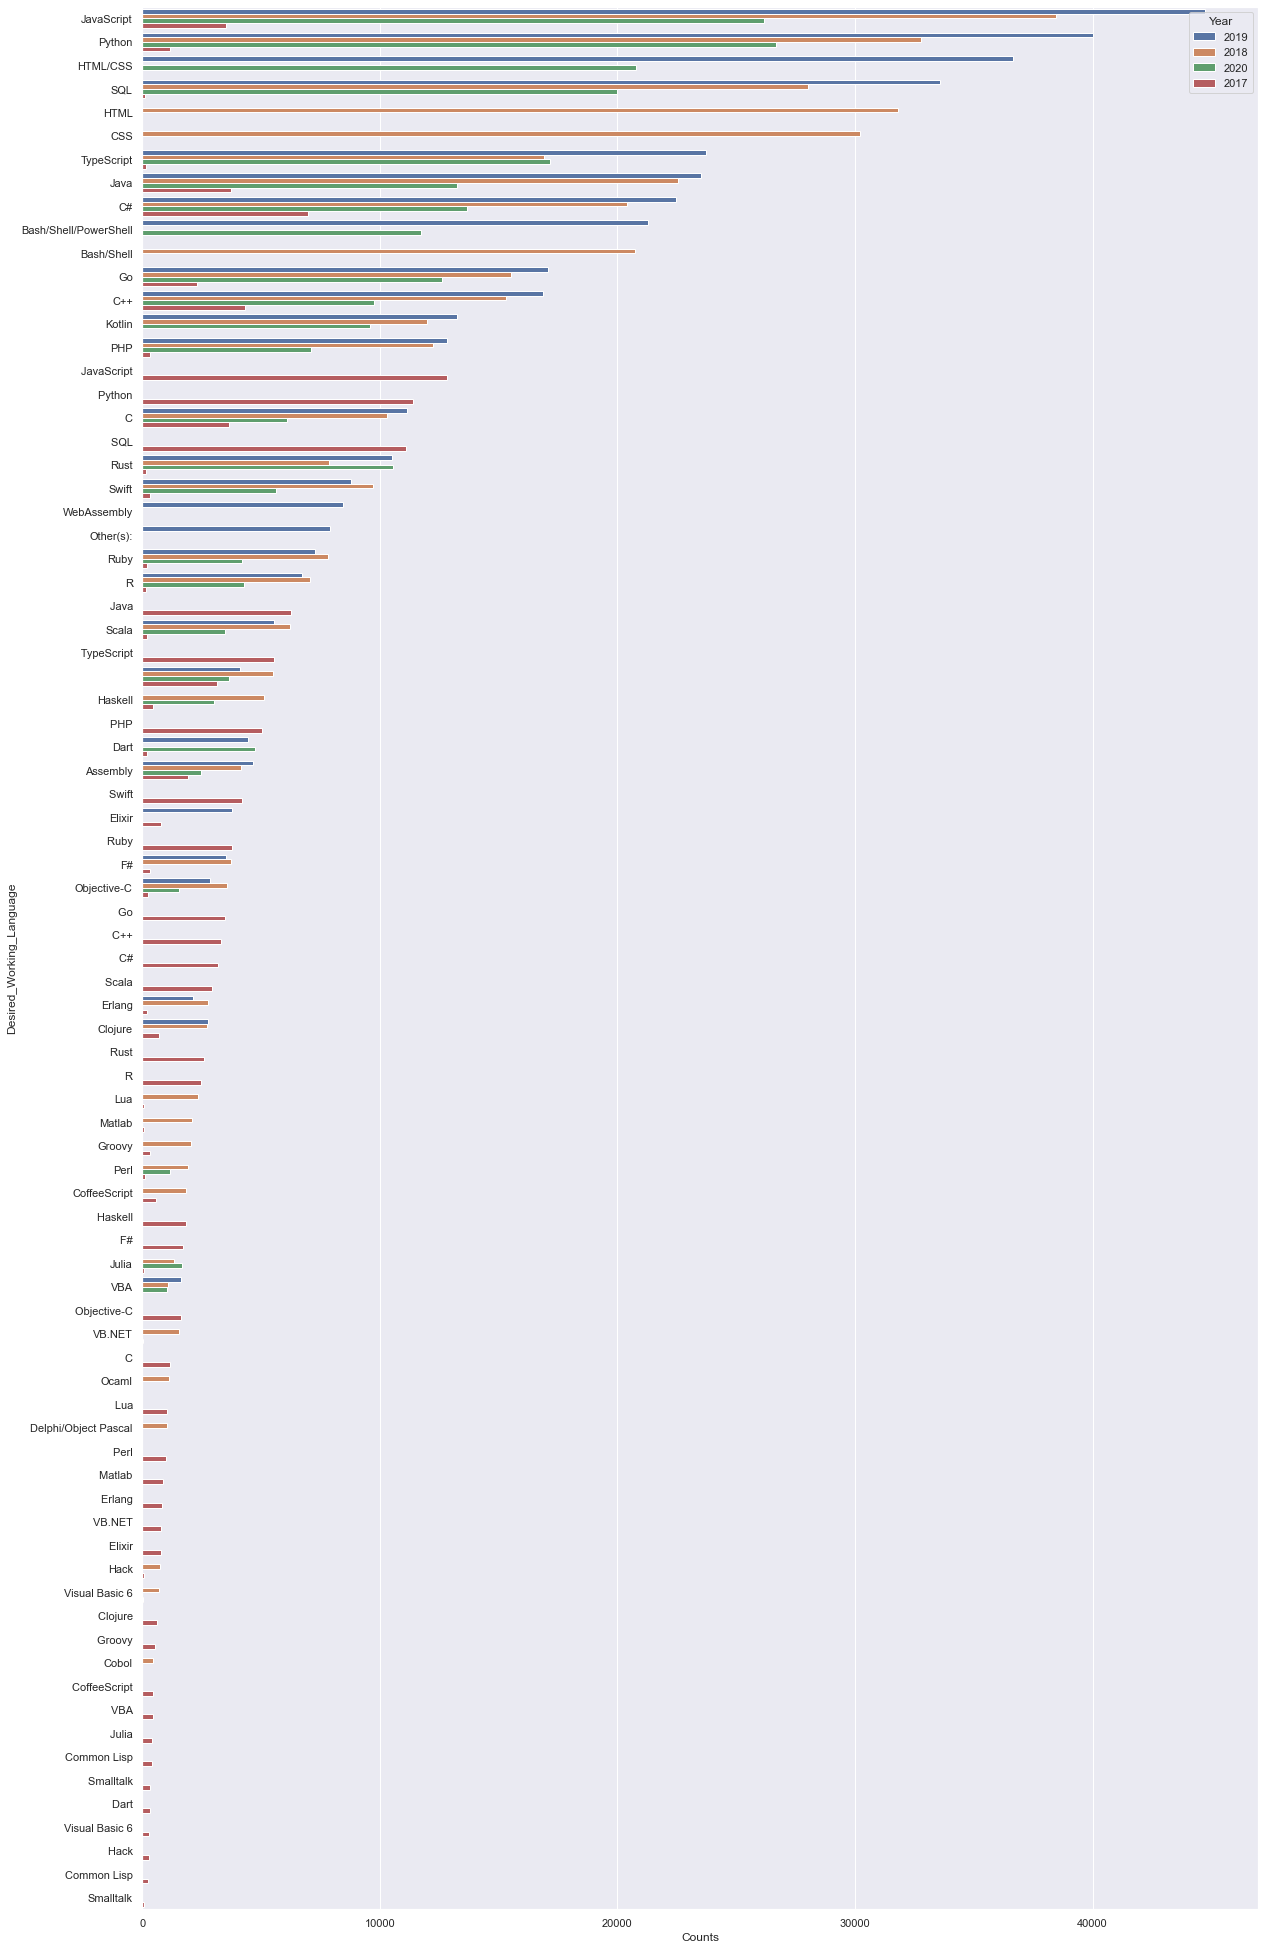

In [16]:
sns.barplot(x = 'Counts', 
            y = 'Desired_Working_Language',
            hue = 'Year',
            data = Final_Count_Desired_df.sort_values(by='Counts', ascending=False))

## How working with databases change over the years?

In [17]:
## Checking column names in different datasets
print('2017 data')
print(Data2017.columns[Data2017.columns.str.contains('Database')])
print('2018 data')
print(Data2018.columns[Data2018.columns.str.contains('Database')])
print('2019 data')
print(Data2019.columns[Data2019.columns.str.contains('Database')])
print('2020 data')
print(Data2020.columns[Data2020.columns.str.contains('Database')])




2017 data
Index(['HaveWorkedDatabase', 'WantWorkDatabase', 'InfluenceDatabase'], dtype='object')
2018 data
Index(['DatabaseWorkedWith', 'DatabaseDesireNextYear'], dtype='object')
2019 data
Index(['DatabaseWorkedWith', 'DatabaseDesireNextYear'], dtype='object')
2020 data
Index(['DatabaseDesireNextYear', 'DatabaseWorkedWith'], dtype='object')


In [18]:
# Extracting Language columns from all datasets and add a Year column and create a new combined dataset to work with
DB_Languages_with_years = pd.DataFrame()
DB_Languages_with_years = DB_Languages_with_years.append(Data2017[['Year','HaveWorkedDatabase','WantWorkDatabase']])
DB_Languages_with_years = DB_Languages_with_years.append(Data2018[['Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])
DB_Languages_with_years = DB_Languages_with_years.append(Data2019[['Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])
DB_Languages_with_years = DB_Languages_with_years.append(Data2020[['Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])

DB_Languages_with_years.head()



,Year,HaveWorkedDatabase,WantWorkDatabase,DatabaseWorkedWith,DatabaseDesireNextYear
0,2017,NaN,NaN,NaN,NaN
1,2017,MySQL; SQLite,MySQL; SQLite,NaN,NaN
2,2017,MySQL,NaN,NaN,NaN
3,2017,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite,NaN,NaN
4,2017,NaN,NaN,NaN,NaN


In [19]:
# Drop rows with all nulls
DB_Languages_with_years = DB_Languages_with_years.dropna(subset=['HaveWorkedDatabase','WantWorkDatabase','DatabaseWorkedWith','DatabaseDesireNextYear'], how='all', axis=0)

# Unifying column names
DB_Languages_with_years['CurrentWorkingDBLanguage'] = DB_Languages_with_years['HaveWorkedDatabase'].fillna('').astype(str) + DB_Languages_with_years['DatabaseWorkedWith'].fillna('').astype(str)
DB_Languages_with_years['DesiredDBLanguage'] = DB_Languages_with_years['WantWorkDatabase'].fillna('').astype(str) + DB_Languages_with_years['DatabaseDesireNextYear'].fillna('').astype(str)
DB_Languages_with_years = DB_Languages_with_years.drop(columns=['HaveWorkedDatabase','WantWorkDatabase','DatabaseWorkedWith','DatabaseDesireNextYear'])

DB_Languages_with_years.head()



,Year,CurrentWorkingDBLanguage,DesiredDBLanguage
1,2017,MySQL; SQLite,MySQL; SQLite
2,2017,MySQL,
3,2017,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite
5,2017,MySQL,
6,2017,SQLite,MongoDB; SQL Server; PostgreSQL; SQLite


In [20]:

List_of_Current_DB_Languages_joined = ', '.join(DB_Languages_with_years['CurrentWorkingDBLanguage'].str.replace(';',','))
List_of_Current_DB_Languages = List_of_Current_DB_Languages_joined.replace(r"/",',').replace(' ','').split(',')

# List_of_Current_Languages
List_of_Current_DB_Languages_unique = set(List_of_Current_DB_Languages)
print('The number of unique current working DB languages is: ' + str(len(List_of_Current_DB_Languages_unique)))

List_of_Desired_DB_Languages_joined = ', '.join(DB_Languages_with_years['DesiredDBLanguage'].str.replace(';',','))
List_of_Desired_DB_Languages = List_of_Desired_DB_Languages_joined.replace(r"/",',').replace(' ','').split(',')

# List_of_Desired_Languages
List_of_Desired_DB_Languages_unique = set(List_of_Desired_DB_Languages)
print('The number of unique Desired working DB languages is: ' + str(len(List_of_Desired_DB_Languages_unique)))

#Are the two list equal?
if List_of_Current_DB_Languages_unique == List_of_Desired_DB_Languages_unique: print("The two lists of DB languages are the same.")

List_of_DB_Languages = List_of_Current_DB_Languages_unique
List_of_DB_Languages.remove('')
List_of_DB_Languages


The number of unique current working DB languages is: 32
The number of unique Desired working DB languages is: 32
The two lists of DB languages are the same.


{'AmazonDynamoDB',
 'AmazonRDS',
 'AmazonRedshift',
 'ApacheHBase',
 'ApacheHive',
 'Aurora',
 'Cassandra',
 'CosmosDB',
 'Couchbase',
 'DynamoDB',
 'Elasticsearch',
 'Firebase',
 'GoogleBigQuery',
 'GoogleCloudStorage',
 'IBMDB2',
 'IBMDb2',
 'MariaDB',
 'Memcached',
 'MicrosoftAzure(Tables',
 'MicrosoftSQLServer',
 'MongoDB',
 'MySQL',
 'Neo4j',
 'Oracle',
 'Other(s):',
 'PostgreSQL',
 'Redis',
 'SQL',
 'SQLServer',
 'SQLite',
 'etc)'}

The top 5 working languages in year 2017: 

['MySQL', 'SQL Server', 'SQLite', 'PostgreSQL', 'MongoDB']




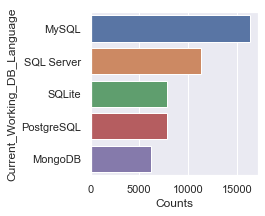

The top 5 working languages in year 2018: 

['MySQL', 'SQL Server', 'PostgreSQL', 'MongoDB', 'SQLite']




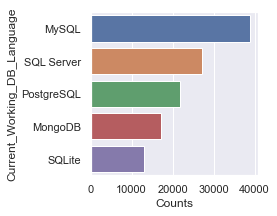

The top 5 working languages in year 2019: 

['MySQL', 'PostgreSQL', 'Microsoft SQL Server', 'SQLite', 'MongoDB']




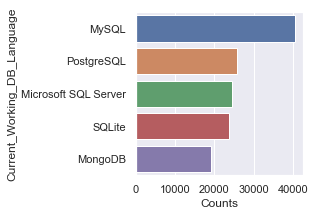

The top 5 working languages in year 2020: 

['MySQL', 'PostgreSQL', 'Microsoft SQL Server', 'SQLite', 'MongoDB']




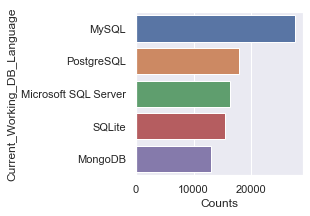

-------------------------------------------
The top 5 desired languages in year 2017: 

['MySQL', 'MongoDB', 'PostgreSQL', 'SQL Server', 'Redis']




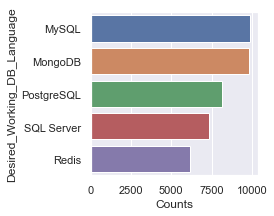

The top 5 desired languages in year 2018: 

['MySQL', 'MongoDB', 'PostgreSQL', 'SQL Server', 'Redis']




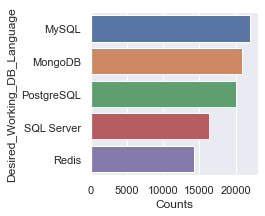

The top 5 desired languages in year 2019: 

['PostgreSQL', 'MySQL', 'MongoDB', 'Redis', 'SQLite']




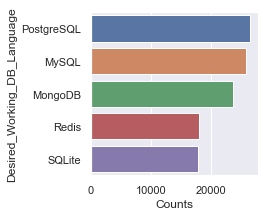

The top 5 desired languages in year 2020: 

['PostgreSQL', 'MongoDB', 'MySQL', 'Redis', 'SQLite']




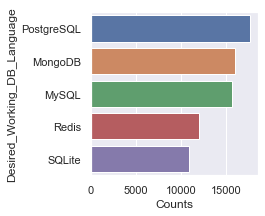

In [21]:
sns.set(rc={'figure.figsize':(3,3)})


## Count Occurences of each Language in Current per Year
Count_Current_DB_df = DB_Languages_with_years.assign(var1=DB_Languages_with_years['CurrentWorkingDBLanguage'].str.split(';')).explode('var1')

Count_Current_DB_df.rename(columns={'var1':'Current_Working_Language'}, inplace=True)
Count_Current_DB_df.drop(columns=['CurrentWorkingDBLanguage','DesiredDBLanguage'], inplace=True)

Count_Current_DB_df['Current_Working_Language'] = Count_Current_DB_df['Current_Working_Language'].str.strip()
Count_Current_DB_df = Count_Current_DB_df[Count_Current_DB_df['Current_Working_Language'] != '']


Final_Count_DB_df = Count_Current_DB_df.value_counts()
Final_Count_DB_df.to_csv('Counts_current_DB_languages.csv')
type(Final_Count_DB_df.to_frame())
Final_Count_DB_df = Final_Count_DB_df.to_frame()
Final_Count_DB_df.reset_index(inplace=True)
Final_Count_DB_df.columns = ['Year','Current_Working_DB_Language','Counts']
Final_Count_DB_df
Final_Count_DB_df.sort_values(by=['Year','Counts'], ascending=False)

for year in ['2017','2018','2019','2020']:
    print('The top 5 working languages in year '+year+ ': \n')
    print(Final_Count_DB_df[Final_Count_DB_df['Year'] == year]['Current_Working_DB_Language'].head(5).to_list())
    print('\n')
#     plt.bar(Final_Count_DB_df[Final_Count_DB_df['Year'] == year]['Current_Working_DB_Language'].head(5))
#     Final_Count_DB_df[Final_Count_DB_df['Year'] == year][['Current_Working_DB_Language','Counts']].head(5).plot(kind='bar')
    plt.figure(year.index(year))
    sns.barplot(x = 'Counts', 
            y = 'Current_Working_DB_Language',
#             hue = 'Year',
            data = Final_Count_DB_df[Final_Count_DB_df['Year'] == year].head(5))
    plt.show()


print('-------------------------------------------')    

## Count Occurences of each Language in Desired per Year
Count_Desired_DB_df = DB_Languages_with_years.assign(var1=DB_Languages_with_years['DesiredDBLanguage'].str.split(';')).explode('var1')

Count_Desired_DB_df.rename(columns={'var1':'Desired_Working_DB_Language'}, inplace=True)
Count_Desired_DB_df.drop(columns=['CurrentWorkingDBLanguage','DesiredDBLanguage'], inplace=True)
# print(Count_Desired_DB_df.head())
Count_Desired_DB_df['Desired_Working_DB_Language'] = Count_Desired_DB_df['Desired_Working_DB_Language'].str.strip()
Count_Desired_DB_df = Count_Desired_DB_df[Count_Desired_DB_df['Desired_Working_DB_Language'] != '']
# print(Count_Desired_DB_df.head())
Final_Count_Desired_DB_df = Count_Desired_DB_df.value_counts()
Final_Count_Desired_DB_df.to_csv('Counts_Desired_DB_languages.csv')
Final_Count_Desired_DB_df = Final_Count_Desired_DB_df.to_frame()
Final_Count_Desired_DB_df.reset_index(inplace=True)
Final_Count_Desired_DB_df.columns = ['Year','Desired_Working_DB_Language','Counts']
# Final_Count_Desired_DB_df
Final_Count_Desired_DB_df.sort_values(by=['Year','Counts'], ascending=False)

for year in ['2017','2018','2019','2020']:
    print('The top 5 desired languages in year '+year+ ': \n')
    print(Final_Count_Desired_DB_df[Final_Count_Desired_DB_df['Year'] == year]['Desired_Working_DB_Language'].head(5).to_list())
    print('\n')
    plt.figure(year.index(year))
    sns.barplot(x = 'Counts', 
            y = 'Desired_Working_DB_Language',
#             hue = 'Year',
            data = Final_Count_Desired_DB_df[Final_Count_Desired_DB_df['Year'] == year].head(5))
    plt.show()


<AxesSubplot:xlabel='Counts', ylabel='Current_Working_DB_Language'>

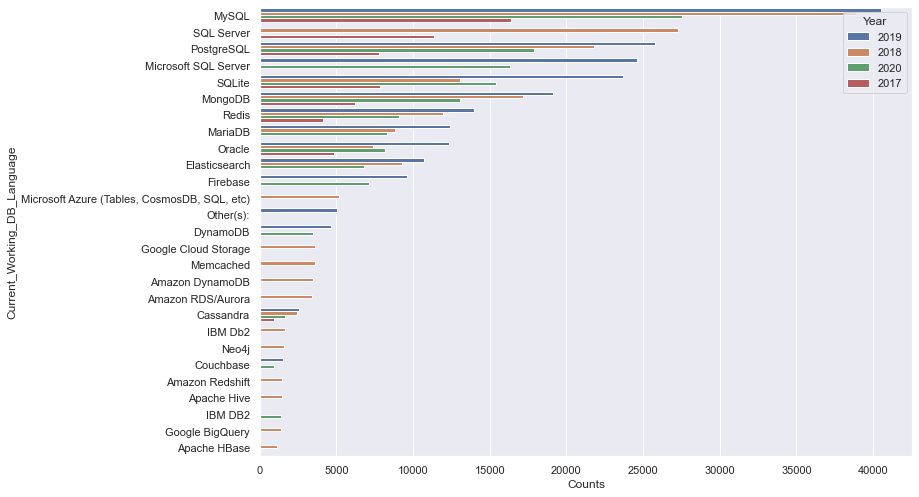

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Counts', 
            y = 'Current_Working_DB_Language',
            hue = 'Year',
            data = Final_Count_DB_df.sort_values(by='Counts', ascending=False))

<AxesSubplot:xlabel='Counts', ylabel='Desired_Working_DB_Language'>

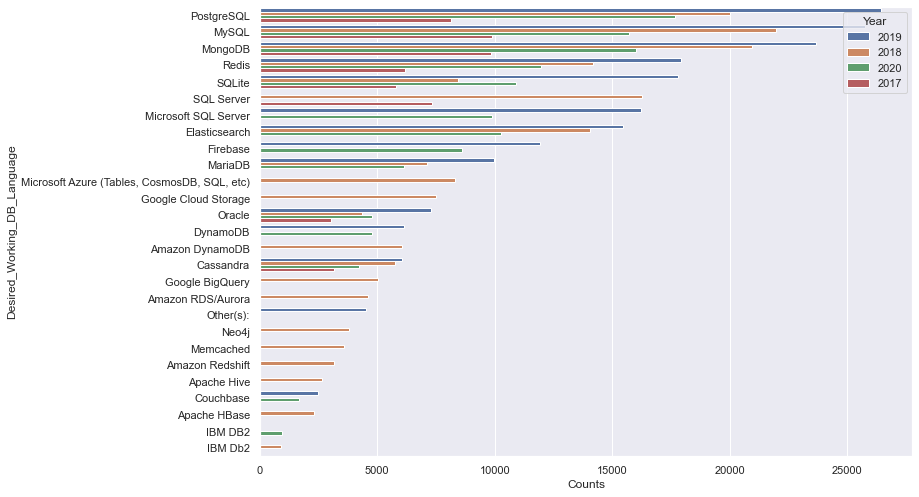

In [23]:
sns.barplot(x = 'Counts', 
            y = 'Desired_Working_DB_Language',
            hue = 'Year',
            data = Final_Count_Desired_DB_df.sort_values(by='Counts', ascending=False))

## Working vs Desired programming and db languages

### Working vs Desired Database Languages

In [24]:
# Extracting Language columns from all datasets and add a Year column and create a new combined dataset to work with
Current_vs_Desired_Language = pd.DataFrame()
Current_vs_Desired_Language = Current_vs_Desired_Language.append(Data2017[['Respondent','Year','HaveWorkedDatabase', 'WantWorkDatabase']])
Current_vs_Desired_Language = Current_vs_Desired_Language.append(Data2018[['Respondent','Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])
Current_vs_Desired_Language = Current_vs_Desired_Language.append(Data2019[['Respondent','Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])
Current_vs_Desired_Language = Current_vs_Desired_Language.append(Data2020[['Respondent','Year','DatabaseWorkedWith', 'DatabaseDesireNextYear']])

Current_vs_Desired_Language.head()

,Respondent,Year,HaveWorkedDatabase,WantWorkDatabase,DatabaseWorkedWith,DatabaseDesireNextYear
0,1,2017,NaN,NaN,NaN,NaN
1,2,2017,MySQL; SQLite,MySQL; SQLite,NaN,NaN
2,3,2017,MySQL,NaN,NaN,NaN
3,4,2017,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite,NaN,NaN
4,5,2017,NaN,NaN,NaN,NaN


In [25]:
# Drop rows with all nulls
Current_vs_Desired_Language = Current_vs_Desired_Language.dropna(subset=['DatabaseWorkedWith','DatabaseDesireNextYear'], how='all', axis=0)

# Unifying column names
Current_vs_Desired_Language['CurrentWorkingDBLanguage'] = Current_vs_Desired_Language['HaveWorkedDatabase'].fillna('').astype(str) + Current_vs_Desired_Language['DatabaseWorkedWith'].fillna('').astype(str)
Current_vs_Desired_Language['DesiredDBLanguage'] = Current_vs_Desired_Language['WantWorkDatabase'].fillna('').astype(str) + Current_vs_Desired_Language['DatabaseDesireNextYear'].fillna('').astype(str)
Current_vs_Desired_Language = Current_vs_Desired_Language.drop(columns=['HaveWorkedDatabase','WantWorkDatabase','DatabaseWorkedWith','DatabaseDesireNextYear'])

Current_vs_Desired_Language.head()



,Respondent,Year,CurrentWorkingDBLanguage,DesiredDBLanguage
0,1,2018,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...
1,3,2018,Redis;PostgreSQL;Memcached,PostgreSQL
3,5,2018,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ..."
4,7,2018,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2
5,8,2018,MongoDB,PostgreSQL


In [26]:
## Count Occurences of each Language in Current per Year
Current_DB_df = Current_vs_Desired_Language.assign(var1=Current_vs_Desired_Language['CurrentWorkingDBLanguage'].str.split(',')).explode('var1')

Current_DB_df.rename(columns={'var1':'Current_Working_DBLanguage'}, inplace=True)
Current_DB_df.drop(columns=['CurrentWorkingDBLanguage','DesiredDBLanguage'], inplace=True)
Current_DB_df

,Respondent,Year,Current_Working_DBLanguage
0,1,2018,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...
0,1,2018,CosmosDB
0,1,2018,SQL
0,1,2018,etc)
1,3,2018,Redis;PostgreSQL;Memcached
...,...,...,...
64447,63796,2020,Microsoft SQL Server;MySQL;Oracle;SQLite
64455,64567,2020,
64457,64867,2020,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...
64459,64925,2020,Oracle


In [27]:
## Count Occurences of each Language in Desired per Year
Desired_DB_df = Current_vs_Desired_Language.assign(var1=Current_vs_Desired_Language['DesiredDBLanguage'].str.split(';')).explode('var1')

Desired_DB_df.rename(columns={'var1':'Desired_Working_DB_Language'}, inplace=True)
Desired_DB_df.drop(columns=['CurrentWorkingDBLanguage','DesiredDBLanguage'], inplace=True)

Desired_DB_df



,Respondent,Year,Desired_Working_DB_Language
0,1,2018,Redis
0,1,2018,SQL Server
0,1,2018,MySQL
0,1,2018,PostgreSQL
0,1,2018,Amazon RDS/Aurora
...,...,...,...
64459,64925,2020,MongoDB
64459,64925,2020,MySQL
64459,64925,2020,PostgreSQL
64460,65112,2020,MariaDB


In [30]:
#compare
# Current_DB_df
# Desired_DB_df
# What is in Current found in Desired


DB_df = pd.merge(Current_DB_df, Desired_DB_df, how='left', on=['Respondent','Year'])
   

DB_df.loc[DB_df['Current_Working_DBLanguage'] != DB_df['Desired_Working_DB_Language'],'Desired_Working_DB_Language'] = np.nan
DB_df.sort_values(by=['Respondent','Year','Current_Working_DBLanguage','Desired_Working_DB_Language'], ascending=False, inplace=True)
DB_df.drop_duplicates(subset=['Respondent','Year','Current_Working_DBLanguage'], inplace=True)
DB_df[DB_df['Respondent']==1]


## Count common between desired and current
len(DB_df[DB_df['Desired_Working_DB_Language'].isnull() == False])/len(DB_df) ## 54%
DB_df
DB_df_final = DB_df[DB_df['Desired_Working_DB_Language'].isnull() == False].drop('Respondent', axis=1)
# DB_df_final = DB_df_final.drop('Respondent', axis=1)
DB_df_final = DB_df_final.value_counts()
DB_df_final = DB_df_final.to_frame().reset_index()
DB_df_final.columns = ['Year','Current_Working_DBLanguage','Desired_Working_DB_Language','Count']

DB_df_final = DB_df_final.sort_values(by=['Year','Count'], ascending=False)
DB_df_final

,Year,Current_Working_DBLanguage,Desired_Working_DB_Language,Count
4,2020,Microsoft SQL Server,Microsoft SQL Server,2119
5,2020,MySQL,MySQL,2001
8,2020,PostgreSQL,PostgreSQL,1355
13,2020,SQLite,SQLite,749
15,2020,MongoDB,MongoDB,599
18,2020,Firebase,Firebase,398
19,2020,Oracle,Oracle,330
23,2020,MariaDB,MariaDB,156
25,2020,DynamoDB,DynamoDB,141
32,2020,Elasticsearch,Elasticsearch,72


48


<AxesSubplot:xlabel='Count', ylabel='Current_Working_DBLanguage'>

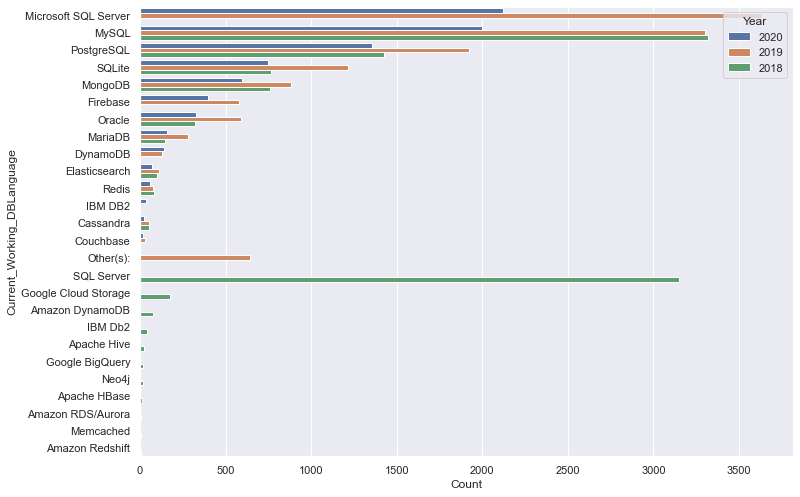

In [31]:
print(len(DB_df_final))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Count', 
            y = 'Current_Working_DBLanguage',
            hue = 'Year',
            data = DB_df_final)

In [35]:
#compare
# Current_DB_df
# Desired_DB_df
# What is in Desired not found in Current


DB_df = pd.merge(Current_DB_df, Desired_DB_df, how='right', on=['Respondent','Year'])
   

DB_df.loc[DB_df['Current_Working_DBLanguage'] != DB_df['Desired_Working_DB_Language'],'Current_Working_DBLanguage'] = np.nan
DB_df.sort_values(by=['Respondent','Year','Current_Working_DBLanguage','Desired_Working_DB_Language'], ascending=False, inplace=True)
DB_df.drop_duplicates(subset=['Respondent','Year','Current_Working_DBLanguage'], inplace=True)
DB_df[DB_df['Respondent']==1]


## Count not found in Current
print(len(DB_df[DB_df['Current_Working_DBLanguage'].isnull() == True])/len(DB_df)) ## 37.8%
DB_df
DB_df_final = DB_df[DB_df['Current_Working_DBLanguage'].isnull() == True].drop(['Respondent','Current_Working_DBLanguage'], axis=1)
DB_df_final = DB_df_final.value_counts()
DB_df_final = DB_df_final.to_frame().reset_index()
DB_df_final.columns = ['Year','Desired_Working_DB_Language','Count']
DB_df_final = DB_df_final[DB_df_final['Desired_Working_DB_Language'] != '']
DB_df_final = DB_df_final.sort_values(by=['Year','Count'], ascending=False)
DB_df_final

0.8503592276605298


,Year,Desired_Working_DB_Language,Count
5,2020,SQLite,10160
8,2020,Redis,8929
12,2020,PostgreSQL,6969
17,2020,MySQL,3799
18,2020,MongoDB,3709
21,2020,Oracle,1741
26,2020,Microsoft SQL Server,1104
28,2020,Firebase,1059
31,2020,Elasticsearch,896
34,2020,MariaDB,395


52


<AxesSubplot:xlabel='Count', ylabel='Desired_Working_DB_Language'>

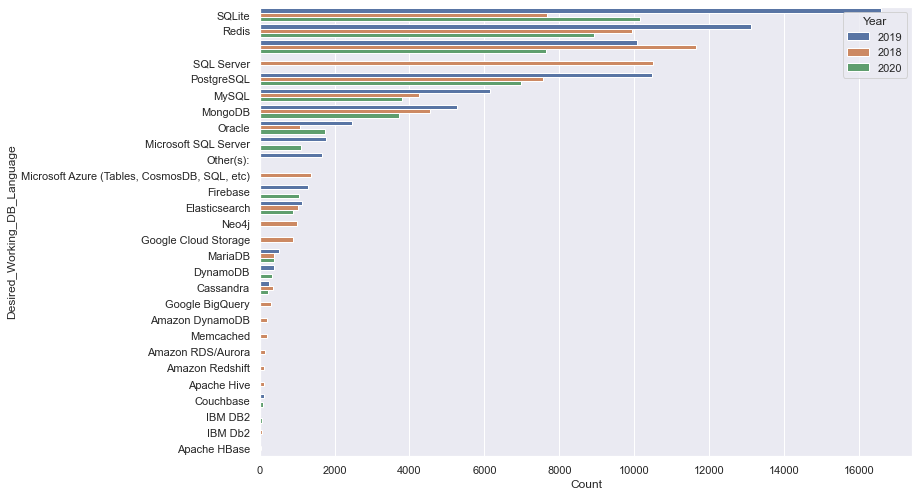

In [33]:
print(len(DB_df_final))
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(x = 'Count', 
            y = 'Desired_Working_DB_Language',
            hue = 'Year',
            data = DB_df_final)

## Comparing Programing languages

In [37]:
# Extracting Language columns from all datasets and add a Year column and create a new combined dataset to work with
Current_vs_Desired_Lang = pd.DataFrame()
Current_vs_Desired_Lang = Current_vs_Desired_Lang.append(Data2017[['Respondent','Year','HaveWorkedLanguage', 'WantWorkLanguage']])
Current_vs_Desired_Lang = Current_vs_Desired_Lang.append(Data2018[['Respondent','Year','LanguageWorkedWith', 'LanguageDesireNextYear']])
Current_vs_Desired_Lang = Current_vs_Desired_Lang.append(Data2019[['Respondent','Year','LanguageWorkedWith', 'LanguageDesireNextYear']])
Current_vs_Desired_Lang = Current_vs_Desired_Lang.append(Data2020[['Respondent','Year','LanguageWorkedWith', 'LanguageDesireNextYear']])

Current_vs_Desired_Lang.head()

# Drop rows with all nulls
Current_vs_Desired_Lang = Current_vs_Desired_Lang.dropna(subset=['LanguageWorkedWith', 'LanguageDesireNextYear'], how='all', axis=0)

# Unifying column names
Current_vs_Desired_Lang['CurrentWorkingLanguage'] = Current_vs_Desired_Lang['HaveWorkedLanguage'].fillna('').astype(str) + Current_vs_Desired_Lang['LanguageWorkedWith'].fillna('').astype(str)
Current_vs_Desired_Lang['DesiredLanguage'] = Current_vs_Desired_Lang['WantWorkLanguage'].fillna('').astype(str) + Current_vs_Desired_Lang['LanguageDesireNextYear'].fillna('').astype(str)
Current_vs_Desired_Lang = Current_vs_Desired_Lang.drop(columns=['HaveWorkedLanguage','WantWorkLanguage','LanguageWorkedWith','LanguageDesireNextYear'])

Current_vs_Desired_Lang.head()




,Respondent,Year,CurrentWorkingLanguage,DesiredLanguage
0,1,2018,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,3,2018,JavaScript;Python;Bash/Shell,Go;Python
3,5,2018,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,7,2018,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell
5,8,2018,Java;JavaScript;Python;TypeScript;HTML;CSS,C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...


In [38]:
## Count Occurences of each Language in Current per Year
Current_Lang_df = Current_vs_Desired_Lang.assign(var1=Current_vs_Desired_Lang['CurrentWorkingLanguage'].str.split(';')).explode('var1')

Current_Lang_df.rename(columns={'var1':'Current_Working_Language'}, inplace=True)
Current_Lang_df.drop(columns=['CurrentWorkingLanguage','DesiredLanguage'], inplace=True)
Current_Lang_df

,Respondent,Year,Current_Working_Language
0,1,2018,JavaScript
0,1,2018,Python
0,1,2018,HTML
0,1,2018,CSS
1,3,2018,JavaScript
...,...,...,...
64460,65112,2020,C#
64460,65112,2020,HTML/CSS
64460,65112,2020,Java
64460,65112,2020,JavaScript


In [39]:
## Count Occurences of each Language in Desired per Year
Desired_Lang_df = Current_vs_Desired_Lang.assign(var1=Current_vs_Desired_Lang['DesiredLanguage'].str.split(';')).explode('var1')

Desired_Lang_df.rename(columns={'var1':'Desired_Working_Language'}, inplace=True)
Desired_Lang_df.drop(columns=['CurrentWorkingLanguage','DesiredLanguage'], inplace=True)

Desired_Lang_df




,Respondent,Year,Desired_Working_Language
0,1,2018,JavaScript
0,1,2018,Python
0,1,2018,HTML
0,1,2018,CSS
1,3,2018,Go
...,...,...,...
64460,65112,2020,C#
64460,65112,2020,HTML/CSS
64460,65112,2020,Java
64460,65112,2020,JavaScript


In [40]:
#compare
# Current_Lang_df
# Desired_Lang_df
# What is in Current found in Desired


Lang_df = pd.merge(Current_Lang_df, Desired_Lang_df, how='left', on=['Respondent','Year'])
   

Lang_df.loc[Lang_df['Current_Working_Language'] != Lang_df['Desired_Working_Language'],'Desired_Working_Language'] = np.nan
Lang_df.sort_values(by=['Respondent','Year','Current_Working_Language','Desired_Working_Language'], ascending=False, inplace=True)
Lang_df.drop_duplicates(subset=['Respondent','Year','Current_Working_Language'], inplace=True)
Lang_df[Lang_df['Respondent']==1]


## Count common between desired and current
len(Lang_df[Lang_df['Desired_Working_Language'].isnull() == False])/len(Lang_df) ## 54%
Lang_df
Lang_df_final = Lang_df[Lang_df['Desired_Working_Language'].isnull() == False].drop('Respondent', axis=1)
# Lang_df_final = Lang_df_final.drop('Respondent', axis=1)
Lang_df_final = Lang_df_final.value_counts()
Lang_df_final = Lang_df_final.to_frame().reset_index()
Lang_df_final.columns = ['Year','Current_Working_Language','Desired_Working_Language','Count']

Lang_df_final = Lang_df_final.sort_values(by=['Year','Count'], ascending=False)
Lang_df_final.to_csv('CommonProgLangTable.csv')
Lang_df_final

,Year,Current_Working_Language,Desired_Working_Language,Count
8,2020,JavaScript,JavaScript,22639
10,2020,HTML/CSS,HTML/CSS,19356
16,2020,SQL,SQL,17778
17,2020,Python,Python,16858
20,2020,C#,C#,10762
...,...,...,...,...
86,2018,Visual Basic 6,Visual Basic 6,312
87,2018,Julia,Julia,227
88,2018,Ocaml,Ocaml,195
89,2018,Hack,Hack,107


91


<AxesSubplot:xlabel='Count', ylabel='Current_Working_Language'>

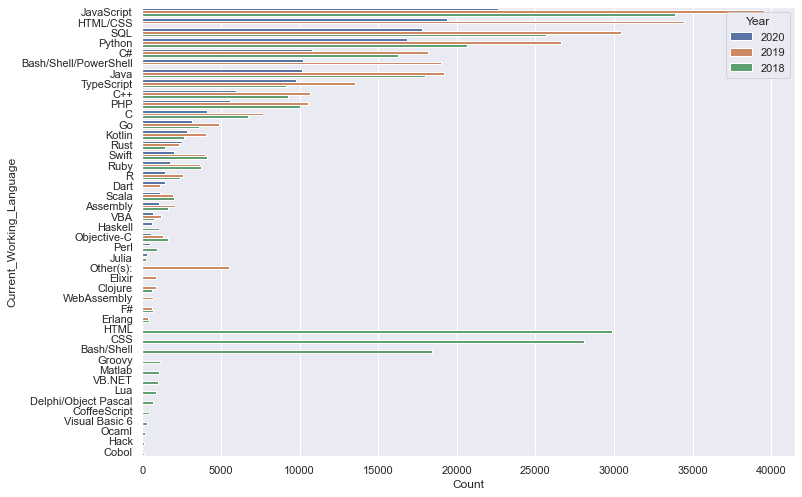

In [41]:
print(len(Lang_df_final))
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x = 'Count', 
            y = 'Current_Working_Language',
            hue = 'Year',
            data = Lang_df_final)

In [42]:
#compare
# Current_Lang_df
# Desired_Lang_df
# What is in Desired not found in Current


Lang_df = pd.merge(Current_Lang_df, Desired_Lang_df, how='right', on=['Respondent','Year'])
   

Lang_df.loc[Lang_df['Current_Working_Language'] != Lang_df['Desired_Working_Language'],'Current_Working_Language'] = np.nan
Lang_df.sort_values(by=['Respondent','Year','Current_Working_Language','Desired_Working_Language'], ascending=False, inplace=True)
Lang_df.drop_duplicates(subset=['Respondent','Year','Current_Working_Language'], inplace=True)
Lang_df[Lang_df['Respondent']==1]


## Count not found in Current
print(len(Lang_df[Lang_df['Current_Working_Language'].isnull() == True])/len(Lang_df)) ## 37.8%
Lang_df
Lang_df_final = Lang_df[Lang_df['Current_Working_Language'].isnull() == True].drop(['Respondent','Current_Working_Language'], axis=1)
Lang_df_final = Lang_df_final.value_counts()
Lang_df_final = Lang_df_final.to_frame().reset_index()
Lang_df_final.columns = ['Year','Desired_Working_Language','Count']

Lang_df_final = Lang_df_final.sort_values(by=['Year','Count'], ascending=False)
Lang_df_final.to_csv('InDesiredProgLangTable.csv')
Lang_df_final

0.24525125672692455


,Year,Desired_Working_Language,Count
2,2020,TypeScript,16775
6,2020,SQL,10203
10,2020,Python,6640
13,2020,Rust,4283
16,2020,,3666
...,...,...,...
88,2018,CoffeeScript,34
89,2018,Groovy,33
91,2018,Hack,24
92,2018,Cobol,9


94


<AxesSubplot:xlabel='Count', ylabel='Desired_Working_Language'>

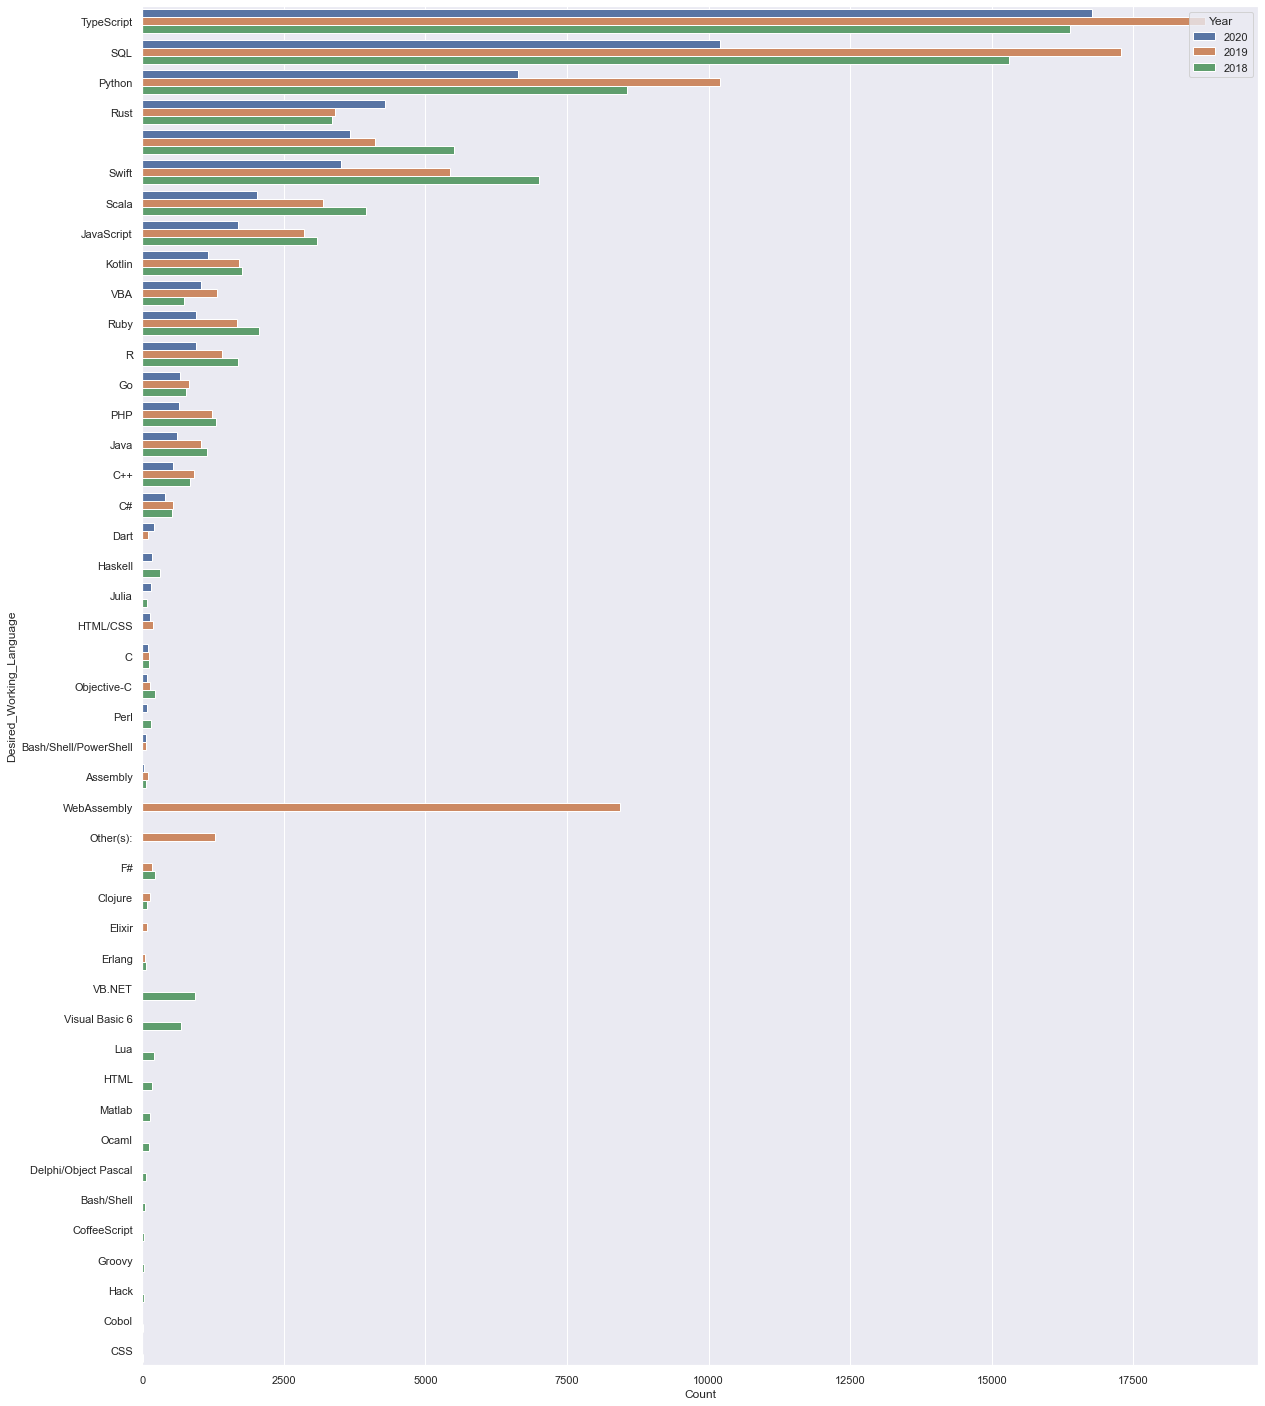

In [43]:
print(len(Lang_df_final))
sns.set(rc={'figure.figsize':(20,25)})


sns.barplot(x = 'Count', 
            y = 'Desired_Working_Language',
            hue = 'Year',
            data = Lang_df_final)